<h1><center>Kebijakan Baru Guna Mengurangi Kecelakaan Lalulintas</center></h1> 
<p><center>by Wirawan Setio Aji</center></p>
<p><center>FTDS014</center></p>




## WEB DEPLOYED AT
[LINK DISINI](https://milestone-1-app.herokuapp.com/)

## 1. Identifikasi masalah

sebelum membuat sebuah kebijakan , perumusan masalah harus dilakukan untuk mencari apa penyebab kecelakaan dari sebuah data kecelakaan di USA pada tahun 2016. pada intinya kita mencari suatu poin  sebuah pertanyaan **Mengapa kecelakaan bisa terjadi ?** dan dan dari pertanyaan tersebut dibentuk rumusan masalah yang dijabarkan beberapa pertanyaan kecil, yaitu :
1. Tinjau dari Waktu
    - kapan angka kecelakaan meningkat terjadi ?
2. Tinjau dari lokasi dari trend berdasarkan waktu
    - di negara bagian mana yang sering terjadi kecelakaan?
    - pada bagian mana?  perkotaan atau pedesaan?
3. apakah sebab cuaca ?
    - bagaimana kondisi cuaca saat kecelakaan terjadi?
4. apakah prilaku pengemudi?
    - bagaimana kondisi pengendara saat tepat sebelum kecelakaan?
    - apakah pengemudi dalam keadaan tidak fokus?
    - apakah pengemudi mengebut ?
5. apakah pandangan pengemudi?
    - bagaimana pencahayaan sekitar jalan ?
    - apakah cuaca menjadi korelasi gangguan pandangan pengemudi?

6. apakah kondisi permukaan jalan berpengaruh ?
    - bagaimana kondisi permukaan jalan ?
    - bagaimana bentuk permukaan jalan tersebut?

dari situ berharap akan melahirkan pertanyaan baru untuk mengerucutkan jawaban pertanyaan utama di atas. sehingga **tujuan** dari analisa ini bisa perpenuhi , tujuannya yaitu **Membuat Kebijakan Baru Guna Mengurangi Kecelakaan Lalulintas**


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats 

## 2. Data Loading & Queries
data kecelakaan di USA pada tahun 2016 diperoleh dari [data source](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=austin_waste&t=waste_and_diversion&page=table&project=projectinitialajie&ws=!1m10!1m4!4m3!1sbigquery-public-data!2snhtsa_traffic_fatalities!3saccident_2016!1m4!1m3!1sprojectinitialajie!2sbquxjob_7124f3f_1825d3ec14c!3sUS)

### Queries

```
SELECT accident.consecutive_number,max(accident.state_name),max(accident.land_use_name),max(accident.timestamp_of_crash),max(accident.light_condition_name),max(accident.latitude),max(accident.longitude),max(vehicle.roadway_surface_condition_name),max(vehicle.roadway_surface_type),max(vehicle.roadway_alignment),max(vehicle.roadway_grade),max(vehicle.speeding_related),max(vehicle.travel_speed),max(distract.driver_distracted_by_name),max(driver.condition_impairment_at_time_of_crash_driver_name),max(vision.drivers_vision_obscured_by_name),max(accident.atmospheric_conditions_name)
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016` as accident
join `bigquery-public-data.nhtsa_traffic_fatalities.vehicle_2016` as vehicle
on accident.consecutive_number = vehicle.consecutive_number 
join `bigquery-public-data.nhtsa_traffic_fatalities.distract_2016` as distract
on accident.consecutive_number = distract.consecutive_number
join `bigquery-public-data.nhtsa_traffic_fatalities.drimpair_2016` as driver
on accident.consecutive_number = driver.consecutive_number
join `bigquery-public-data.nhtsa_traffic_fatalities.vision_2016` as vision
on accident.consecutive_number = vision.consecutive_number
where vehicle.travel_speed != 999 and vehicle.travel_speed != 998 and distract.driver_distracted_by_name != 'Not Reported' and distract.driver_distracted_by_name != 'Unknown if Distracted' and driver.condition_impairment_at_time_of_crash_driver_name != 'Not Reported' and driver.condition_impairment_at_time_of_crash_driver_name != 'Unknown if Impaired' and vehicle.roadway_grade != 'Not Reported' and vision.drivers_vision_obscured_by_name != 'Unknown'and vehicle.roadway_alignment != 'Not Reported' and vehicle.speeding_related != 'Unknown' and accident.atmospheric_conditions_name != 'Unknown'and accident.atmospheric_conditions_name != 'Not Reported' and accident.atmospheric_conditions_name != 'No Additional Atmospheric Conditions' 
group by accident.consecutive_number
limit 30000
```

### Data Loading

In [2]:
list_na =  ['Unknown','Not Reported','Other'] # add missing value definition
df_accident = pd.read_csv('./data/data_accident_2016.csv',na_values=list_na)
df_accident

,consecutive_number,f0_,f1_,f2_,f3_,f4_,f5_,f6_,f7_,f8_,f9_,f10_,f11_,f12_,f13_,f14_,f15_
0,121570,Florida,Urban,2016-07-21T19:37:00Z,Daylight,26.275011,-80.125189,Dry,NaN,Straight,Level,No,57,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear
1,63236,California,Urban,2016-11-23T06:43:00Z,Daylight,34.048444,-118.448042,Dry,Concrete,Curve Left,Downhill,No,65,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear
2,10135,Alabama,Rural,2016-04-02T13:25:00Z,Daylight,32.545372,-86.453214,Dry,"Blacktop, Bituminous, or Asphalt",Straight,Level,No,70,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear
3,61469,California,Urban,2016-07-01T19:38:00Z,Daylight,37.554389,-122.029139,Dry,"Blacktop, Bituminous, or Asphalt",Straight,Level,No,60,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear
4,122434,Florida,Urban,2016-11-08T09:15:00Z,Daylight,27.716028,-82.679344,Dry,NaN,Straight,Level,No,70,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,40784,Arizona,Urban,2016-11-07T14:23:00Z,Daylight,33.486153,-112.069436,Dry,"Blacktop, Bituminous, or Asphalt",Straight,Level,"Yes, Too Fast for Conditions",31,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear
7372,120350,Florida,Urban,2016-02-17T21:18:00Z,Dark – Lighted,26.446833,-80.092506,Dry,NaN,Straight,Level,No,45,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear
7373,391000,Ohio,Trafficway Not in State Inventory,2016-12-03T01:20:00Z,Dark – Not Lighted,41.387233,-81.792853,Wet,"Blacktop, Bituminous, or Asphalt",Curve Right,Level,"Yes, Too Fast for Conditions",68,Not Distracted,"Under the Influence of Alcohol, Drugs or Medic...",No Obstruction Noted,Clear
7374,390062,Ohio,Trafficway Not in State Inventory,2016-01-12T17:02:00Z,Daylight,41.396125,-82.042122,Snow,Concrete,Straight,Level,No,25,Not Distracted,None/Apparently Normal,"Rain, Snow, Fog, Smoke, Sand, Dust","Blowing Sand, Soil, Dirt"


## 3. Data Cleaning

### Missing Value
check jika ada missing value

In [3]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7376 entries, 0 to 7375
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   consecutive_number  7376 non-null   int64  
 1   f0_                 7376 non-null   object 
 2   f1_                 7376 non-null   object 
 3   f2_                 7376 non-null   object 
 4   f3_                 7373 non-null   object 
 5   f4_                 7376 non-null   float64
 6   f5_                 7376 non-null   float64
 7   f6_                 7365 non-null   object 
 8   f7_                 4944 non-null   object 
 9   f8_                 7372 non-null   object 
 10  f9_                 7365 non-null   object 
 11  f10_                7376 non-null   object 
 12  f11_                7376 non-null   int64  
 13  f12_                7376 non-null   object 
 14  f13_                7376 non-null   object 
 15  f14_                7376 non-null   object 
 16  f15_  

- terdapat beberapa missing value, **drop** semua missing value

In [4]:
df_accident.dropna(axis=0,inplace=True)
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4921 entries, 1 to 7375
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   consecutive_number  4921 non-null   int64  
 1   f0_                 4921 non-null   object 
 2   f1_                 4921 non-null   object 
 3   f2_                 4921 non-null   object 
 4   f3_                 4921 non-null   object 
 5   f4_                 4921 non-null   float64
 6   f5_                 4921 non-null   float64
 7   f6_                 4921 non-null   object 
 8   f7_                 4921 non-null   object 
 9   f8_                 4921 non-null   object 
 10  f9_                 4921 non-null   object 
 11  f10_                4921 non-null   object 
 12  f11_                4921 non-null   int64  
 13  f12_                4921 non-null   object 
 14  f13_                4921 non-null   object 
 15  f14_                4921 non-null   object 
 16  f15_  

- buat `timestamp_of_crash` menjadi **time format**

In [5]:
df_accident['f2_'] =  pd.to_datetime(df_accident['f2_'])
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4921 entries, 1 to 7375
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   consecutive_number  4921 non-null   int64              
 1   f0_                 4921 non-null   object             
 2   f1_                 4921 non-null   object             
 3   f2_                 4921 non-null   datetime64[ns, UTC]
 4   f3_                 4921 non-null   object             
 5   f4_                 4921 non-null   float64            
 6   f5_                 4921 non-null   float64            
 7   f6_                 4921 non-null   object             
 8   f7_                 4921 non-null   object             
 9   f8_                 4921 non-null   object             
 10  f9_                 4921 non-null   object             
 11  f10_                4921 non-null   object             
 12  f11_                4921 non-null 

In [6]:
df_accident['f2_'].max()

Timestamp('2016-12-31 22:21:00+0000', tz='UTC')

### Ganti Nama Kolom

In [7]:
df_accident.columns = ['accident_id','state','pop_area','time','light_condition','latitude','longitude','surface_cond','surface_type','rd_allignment','rd_grade','is_speeding','speed','d_distraction','d_impairment','d_vision','weather']

In [8]:
df_accident = df_accident.query('speed!=997') 

- backup `df_accident` pada variable `copy_accident`

In [9]:
copy_accident = df_accident.copy()

### Bagi format waktu
tiga series waktu untuk, bulan, hari dan jam

In [10]:
copy_accident['month'] = pd.to_datetime(copy_accident['time']).dt.month
copy_accident['day'] = pd.to_datetime(copy_accident['time']).dt.day
copy_accident['hour'] = pd.to_datetime(copy_accident['time']).dt.hour


In [11]:
copy_accident

,accident_id,state,pop_area,time,light_condition,latitude,longitude,surface_cond,surface_type,rd_allignment,rd_grade,is_speeding,speed,d_distraction,d_impairment,d_vision,weather,month,day,hour
1,63236,California,Urban,2016-11-23 06:43:00+00:00,Daylight,34.048444,-118.448042,Dry,Concrete,Curve Left,Downhill,No,65,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear,11,23,6
2,10135,Alabama,Rural,2016-04-02 13:25:00+00:00,Daylight,32.545372,-86.453214,Dry,"Blacktop, Bituminous, or Asphalt",Straight,Level,No,70,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear,4,2,13
3,61469,California,Urban,2016-07-01 19:38:00+00:00,Daylight,37.554389,-122.029139,Dry,"Blacktop, Bituminous, or Asphalt",Straight,Level,No,60,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear,7,1,19
5,270204,Minnesota,Urban,2016-08-10 17:06:00+00:00,Daylight,43.875289,-93.276814,Dry,"Blacktop, Bituminous, or Asphalt",Straight,Level,No,70,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear,8,10,17
8,61863,California,Rural,2016-09-18 02:24:00+00:00,Dark – Lighted,38.510978,-121.779458,Dry,Concrete,Straight,Level,No,65,Not Distracted,Asleep or Fatigued,No Obstruction Noted,Clear,9,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,370994,North Carolina,Urban,2016-10-11 16:59:00+00:00,Daylight,36.088822,-78.364914,Dry,"Blacktop, Bituminous, or Asphalt",Straight,Level,No,55,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear,10,11,16
7371,40784,Arizona,Urban,2016-11-07 14:23:00+00:00,Daylight,33.486153,-112.069436,Dry,"Blacktop, Bituminous, or Asphalt",Straight,Level,"Yes, Too Fast for Conditions",31,Not Distracted,None/Apparently Normal,No Obstruction Noted,Clear,11,7,14
7373,391000,Ohio,Trafficway Not in State Inventory,2016-12-03 01:20:00+00:00,Dark – Not Lighted,41.387233,-81.792853,Wet,"Blacktop, Bituminous, or Asphalt",Curve Right,Level,"Yes, Too Fast for Conditions",68,Not Distracted,"Under the Influence of Alcohol, Drugs or Medic...",No Obstruction Noted,Clear,12,3,1
7374,390062,Ohio,Trafficway Not in State Inventory,2016-01-12 17:02:00+00:00,Daylight,41.396125,-82.042122,Snow,Concrete,Straight,Level,No,25,Not Distracted,None/Apparently Normal,"Rain, Snow, Fog, Smoke, Sand, Dust","Blowing Sand, Soil, Dirt",1,12,17


### Generalisasi yang bersifat hampir sama

- generalize `is_speeding` into **yes** or **no**

In [12]:

yes_list = ['Yes, Exceeded Speed Limit', 'Yes, Racing',  'Yes, Specifics Unknown', 'Yes, Too Fast for Conditions']
result = []
for val in copy_accident['is_speeding']:
    if val  in yes_list:
        result.append('Yes')
    else:
        result.append('No')

copy_accident['is_speeding'] = result

- generalize `light_condition` dark variation into **dark** 

In [13]:
dark_list = [ 'Dark – Lighted', 'Dark – Not Lighted', 'Dusk',
       'Dark – Unknown Lighting']
result = []
for val in copy_accident['light_condition']:
    if val in dark_list:
        result.append('Dark')
    else:
        result.append(val)

copy_accident['light_condition'] = result

copy_accident['light_condition'].value_counts()

Daylight    2705
Dark        2125
Dawn          90
Name: light_condition, dtype: int64

- generalize `d_distraction` into more compact format

In [14]:
phone_list = ['While Talking or Listening to Cellular Phone','While Manipulating Cellular Phone','Other Cellular Phone Related']
dist_list = ['By a Moving Object in Vehicle','Lost In Thought/Day Dreaming',
             'While Adjusting Audio or Climate Controls','Distraction/Inattention','Eating or Drinking','By Other Occupant(s)',
             'While Using Other Component/Controls Integral to Vehicle','Looked But Did Not See', 'Other Distraction', 
             'While Using or Reaching For Device/Object Brought Into Vehicle',
            'Distracted by Outside Person, Object or Event',
            'Inattention (Inattentive), Details Unknown',
            'Distraction (Distracted), Details Unknown','Smoking Related','Careless/Inattentive'] 
result = []
for val in copy_accident['d_distraction']:
    if val in phone_list:
        result.append('Phone Related')
    elif val in dist_list:
        result.append('Activity While Driving')
    else:
        result.append(val)

copy_accident['d_distraction'] = result

copy_accident['d_distraction'].value_counts()

Not Distracted                                 4380
Activity While Driving                          396
Phone Related                                    89
No Driver Present/Unknown if Driver Present      55
Name: d_distraction, dtype: int64

## 4. Analysis & Perhitungan

### Waktu Kecelakaan
jika dilihat dari tanggal kecelakaan, pada bulan dan jam berapa saja terjadi kecelakaan?

In [15]:
copy_accident.sort_values('time',ascending=False,inplace=True)

<AxesSubplot:xlabel='hour'>

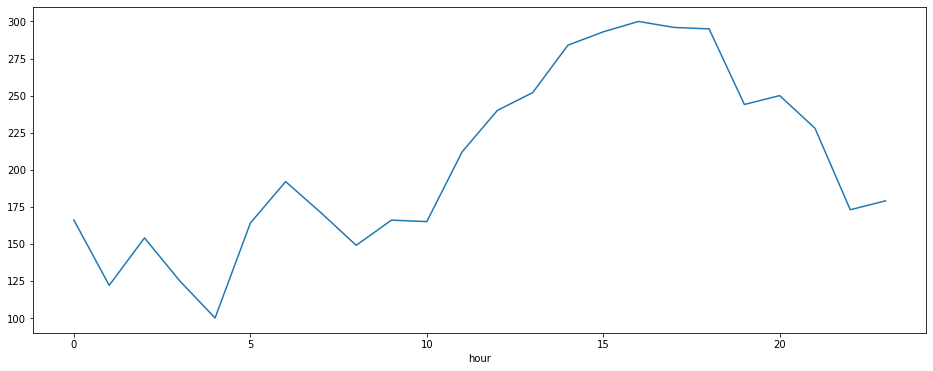

In [16]:
copy_accident.groupby('hour')['hour'].count().plot(figsize=(16,6))

jika dilihat dari grafik diatas, terdapat peningkatan yang **sangat pesat** pada **jam 10 pagi sd sekitar 5 sore**

- secara statistika **Inferential** Seberapa signifikan frequensi kecelakaan dari pukul 10 sd 17 jika rata-rata total frekuensi nya adalah adalah **185.5** pada confidence interval 90%

    - H0: frequensi kecelakaan dari pukul 10 sd 17 = 185 <br>
    - H1 : frequensi kecelakaan dari pukul 10 sd 17 != 185

In [17]:
avg = copy_accident['hour'].value_counts().mean()
# ambil data pada pukul 10 hingga 17
df_filter = copy_accident.query("hour >= 10 and hour <= 17 ")
# menggunakan ttest 1 sample 1 tail
t_stat,p_val = stats.ttest_1samp(df_filter['hour'].value_counts(), avg)
print("P Value adalah",p_val/2)

P Value adalah 0.01059994551891233


In [18]:
df_filter['hour'].value_counts().mean()

255.25

c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


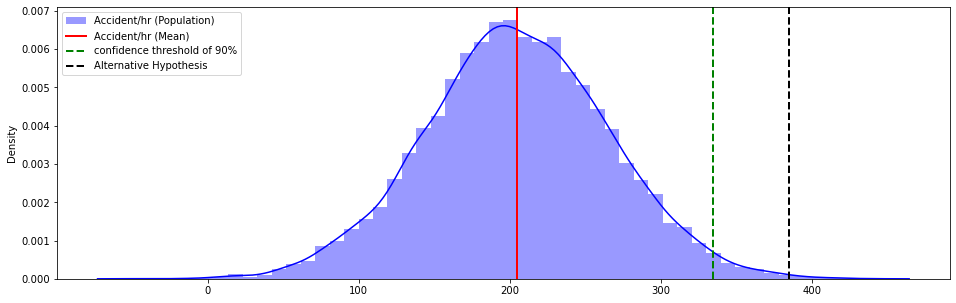

In [19]:
accident_pop = np.random.normal(copy_accident['hour'].value_counts().mean(), copy_accident['hour'].value_counts().std(), 10000)
ci = stats.norm.interval(0.90, df_filter['hour'].value_counts().mean(), df_filter['hour'].value_counts().std())

plt.figure(figsize=(16,5))
sns.distplot(accident_pop, label='Accident/hr (Population)', color='blue')
plt.axvline(copy_accident['hour'].value_counts().mean(), color='red', linewidth=2, label='Accident/hr (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 90%')
plt.axvline(accident_pop.mean() + t_stat*accident_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

**H0 telah ditolak**, karena **p value < 0.1** kenaikan kecelakaan dari pukul 10 sd 17 adalah **signifikan**

In [20]:
time_dict = {}
for val in range(1,13):
    time_dict[str(val)] = copy_accident.query("month == @val").groupby('day').count()['hour']
col=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
by_month = pd.DataFrame(time_dict)
by_month.mean()

1     10.709677
2     12.586207
3     13.064516
4     13.866667
5     13.612903
6     15.200000
7     13.451613
8     14.645161
9     14.966667
10    14.580645
11    13.866667
12    10.838710
dtype: float64

### Lokasi Kecelakaan
jika diambil kondisi pada pukul 10 hingga 17 dan cari tau lokasi nya

In [21]:
state_mean = df_filter['state'].value_counts().mean()
state_mean

41.673469387755105

rata-rata jumlah kejadian setiap **negara bagian** pada waktu yang sudah ditentukan adalah **41.69**

<AxesSubplot:>

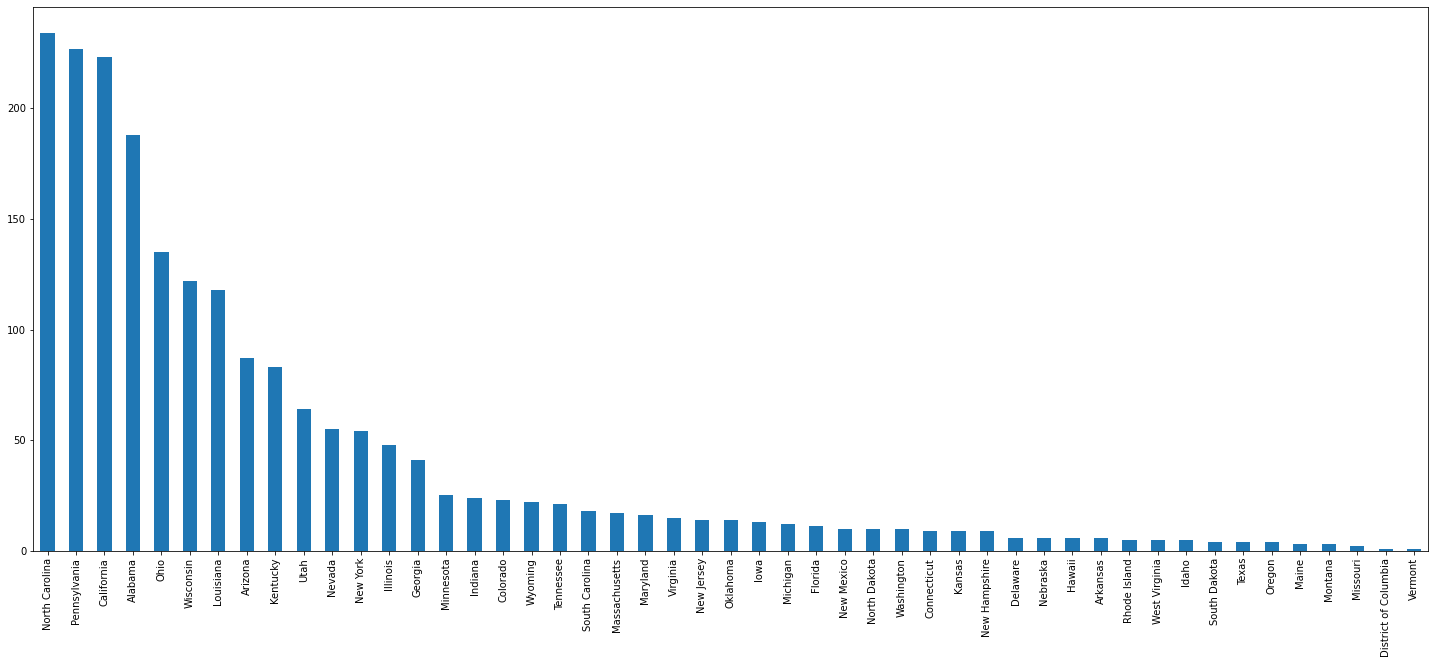

In [22]:
# gunakan value count untuk melihat frequensi pada setiap negara bagian
df_filter['state'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(25,10))

- dari hasil tersebut, ambil negara bagian yang kasusnya dia atas rata-rata

In [23]:
#buat list untuk memilih kota dengan jumlah kasus diatas rata rata
s_list = []
for i,v in df_filter['state'].value_counts().items():
    if v > state_mean:
        s_list.append(i)
# simpan  pada variable
above_avg_state = df_filter.query("state in @s_list and pop_area != 'Trafficway Not in State Inventory'")

In [24]:
above_avg_state.state.unique()

array(['Utah', 'Pennsylvania', 'North Carolina', 'Arizona', 'Alabama',
       'California', 'Kentucky', 'New York', 'Louisiana', 'Ohio',
       'Wisconsin', 'Illinois', 'Nevada'], dtype=object)

negara bagian yang kejadiannya diatas rata-rata adalah 'Utah', 'Pennsylvania', 'North Carolina', 'Arizona', 'Alabama','California', 'Kentucky', 'New York', 'Louisiana', 'Ohio',Wisconsin', 'Illinois', 'Nevada'

- dari negara bagian yang sudah dipilih, tinjau berdasarkan populasi area

<AxesSubplot:>

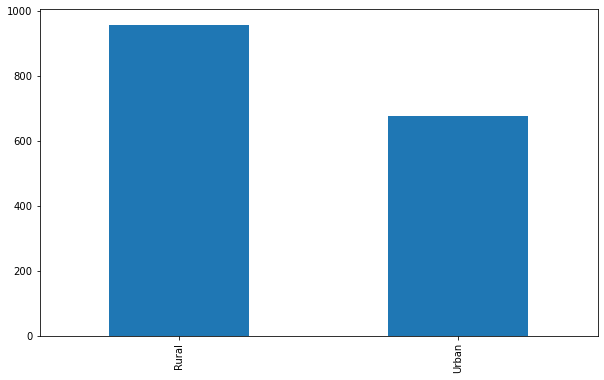

In [25]:
above_avg_state['pop_area'].value_counts().plot(kind='bar',figsize=(10,6))


- jika dilihat secara populasi area antara `Rural` dan `urban` pada area `Rural` terlihat lebih banyak
- untuk melihat seberapa signifikan perbedaannya kita coba Hypothesis testing **Chi Test** dengan Confidence pada 95% hipotesis : 
    - H0 : mean of Rural area every month = mean of Urban area every month
    - H1 : mean of Rural area every month != mean of Urban area every month

In [26]:
# buat table perbulan pada setiap populasi area
contingency_table = pd.crosstab(above_avg_state['month'],above_avg_state['pop_area'])

stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Insignificant')
else:
    print('Significant')


p=0.029
Significant


**H0 telah ditolak** maka ,perbedaan rata-rata kasus perbulannya **sangat berbeda**

### Cuaca
jika kita mengerti USA adalah negara dengan 4 musim, tentunya akan ada banyak kemungkinan cuaca yang terjadi , tapi apakah akan menjadi alasan terjadi kecelakaan?

- dari data negara bagian diatas rata-rata, kita tinjau keadaan cuaca

<AxesSubplot:xlabel='hour'>

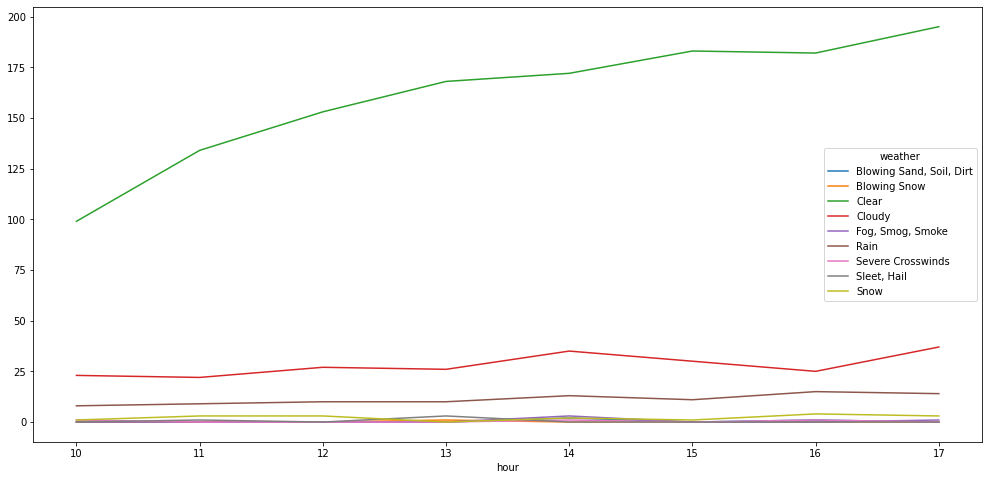

In [27]:
weather = pd.crosstab(above_avg_state['hour'],above_avg_state['weather'])
weather.plot(figsize=(17,8))

ketika dilihat dari jumlah kejadian kecelakaan, kecelakaan terjadi pada cuaca **Cerah**

### Prilaku pengemudi

coba tinjau prilaku pengemudi yang mengalami kecelakaan tiap **jam** pada pukul 10 sd 17

<AxesSubplot:xlabel='hour'>

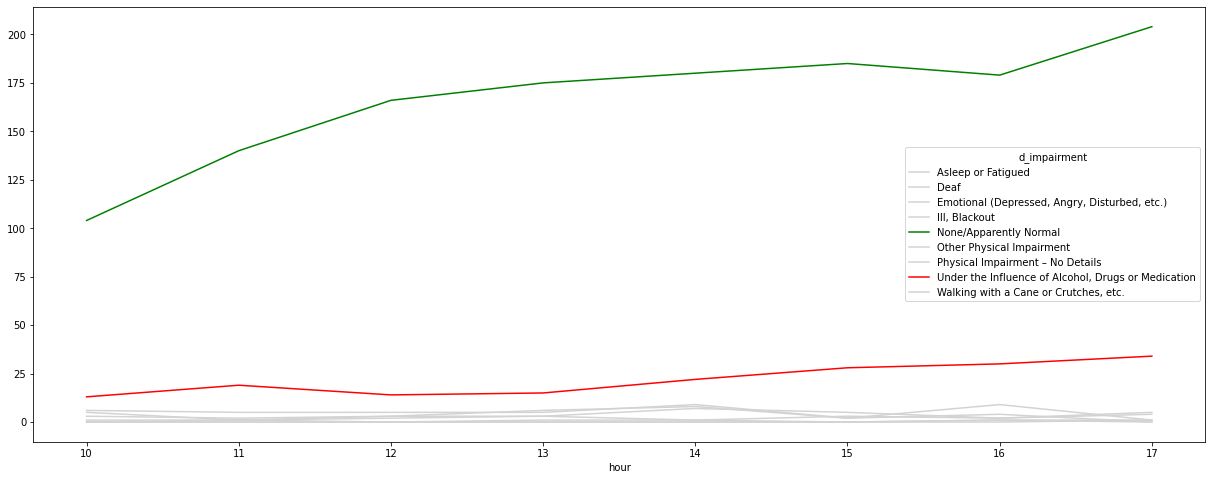

In [28]:
cond_list = [ 'None/Apparently Normal', 'Under the Influence of Alcohol, Drugs or Medication']

color_list = []
highlight = ['green','red']
enum = 0

cross_tab = pd.crosstab(above_avg_state['hour'],above_avg_state['d_impairment'])

for k in cross_tab.columns:
    if k in cond_list:
        color_list.append(highlight[enum])
        enum += 1
    else:
        color_list.append('lightgrey')

cross_tab.plot(figsize=(21,8),color=color_list)


coba tinjau prilaku pengemudi yang mengalami kecelakaan tiap **bulan** pada pukul 10 sd 17

<AxesSubplot:xlabel='month'>

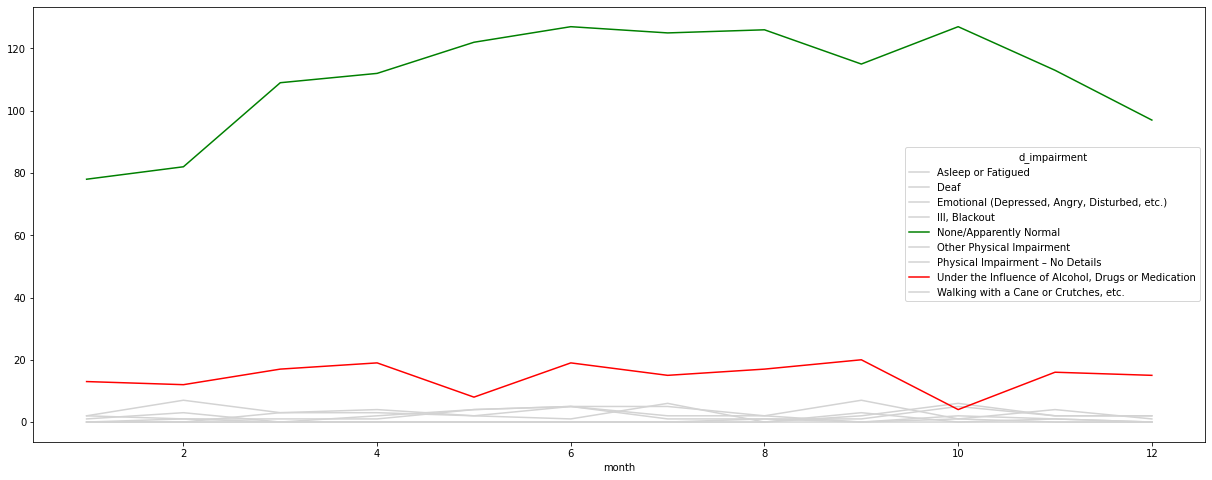

In [29]:
cross_tab = pd.crosstab(above_avg_state['month'],above_avg_state['d_impairment'])
cross_tab.plot(figsize=(21,8),color=color_list)

jika dilihat 2 plot diatas, sangat banyak sekali pengemudi yang dalam keadaan **normal** dan orang-orang terpengaruh **alkohol atau obat-obatan** menjadi urutan ke-2, akan tetapi jika kita lihat orang-orang terpengaruh **alkohol atau obat-obatan** setiap jamnya naik secara konstan, dan orang-orang terpengaruh **alkohol atau obat-obatan** tiap bulannya turun pada bulan **May** dan **October**

- apakah pengendara ngebut saat kecelakaan ?

<AxesSubplot:xlabel='hour'>

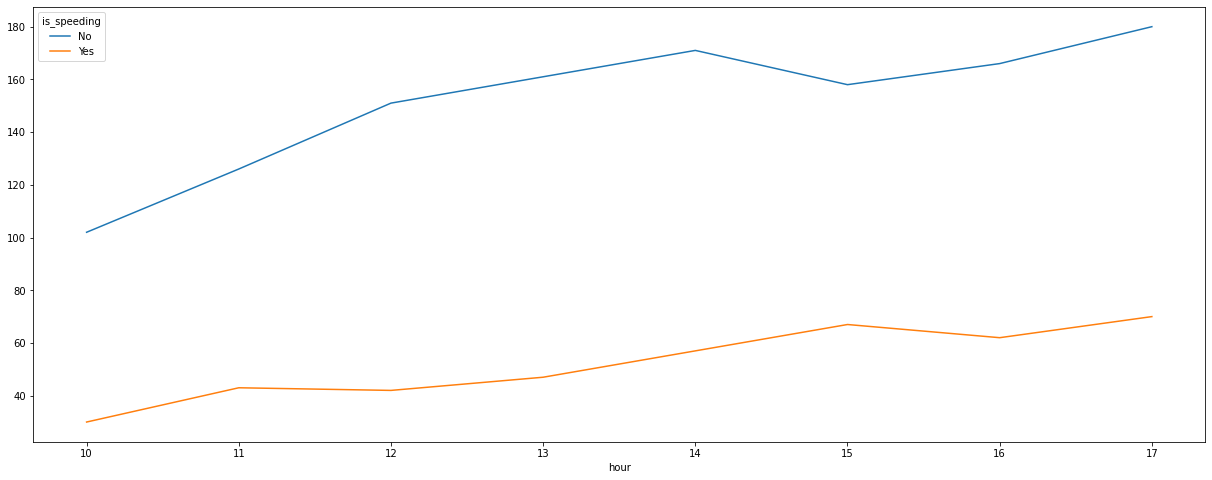

In [30]:
cross_tab = pd.crosstab(above_avg_state['hour'],above_avg_state['is_speeding'])
cross_tab.plot(figsize=(21,8))

In [31]:
above_avg_state['speed'].describe().T

count    1633.000000
mean       47.883037
std        21.754573
min         0.000000
25%        38.000000
50%        50.000000
75%        60.000000
max       130.000000
Name: speed, dtype: float64

<AxesSubplot:xlabel='hour'>

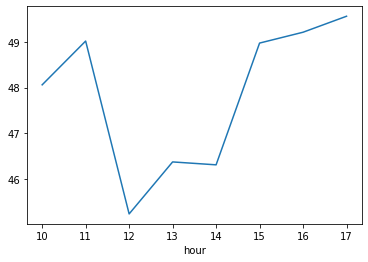

In [32]:
above_avg_state.groupby('hour')['speed'].mean().plot()

jika dilihat dari kelompok tiap jam, adanya **peningkatan drastis** pada pukul 14 hingga 17

- apakah fokus **pengemudi terganggu** sesuatu ?

<AxesSubplot:xlabel='hour'>

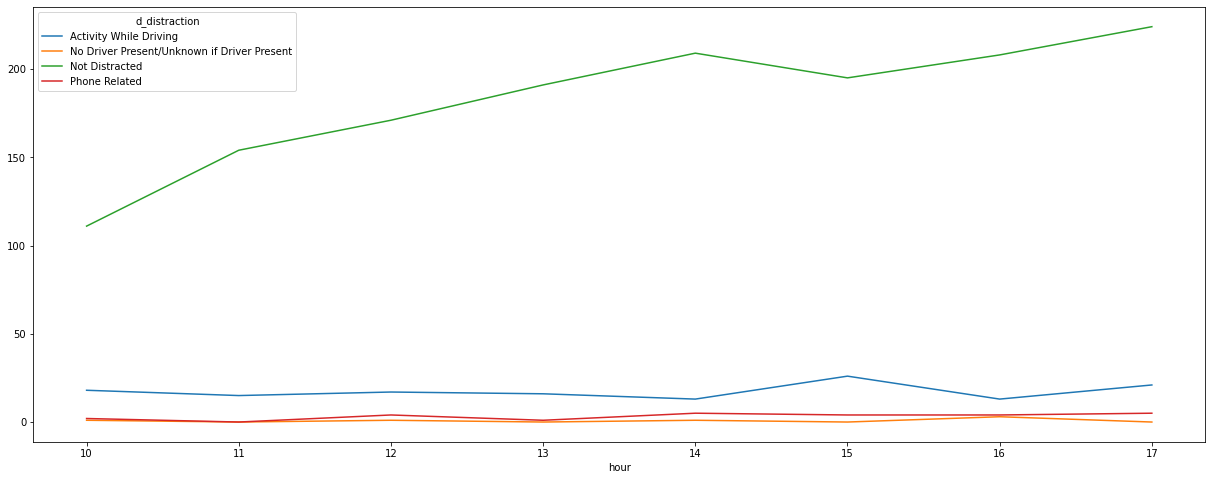

In [33]:
cross_tab = pd.crosstab(above_avg_state['hour'],above_avg_state['d_distraction'])
cross_tab.plot(kind='line',figsize=(21,8))

- dapat dilihat disini, bahwa prilaku **kebanyakan** pengemudi dalam **keadaan fokus** dan ada **sedikit** **melakukan aktifitas** sambil berkendara

### Pandangan


- bagaimana masa waktu ketika terjadi kecelakaan ?<br>
jika dilihat berkendara dalam keadaan **gelap** atau **terang** menjadi penyumbang kecelakaan terbanyak

<AxesSubplot:xlabel='month'>

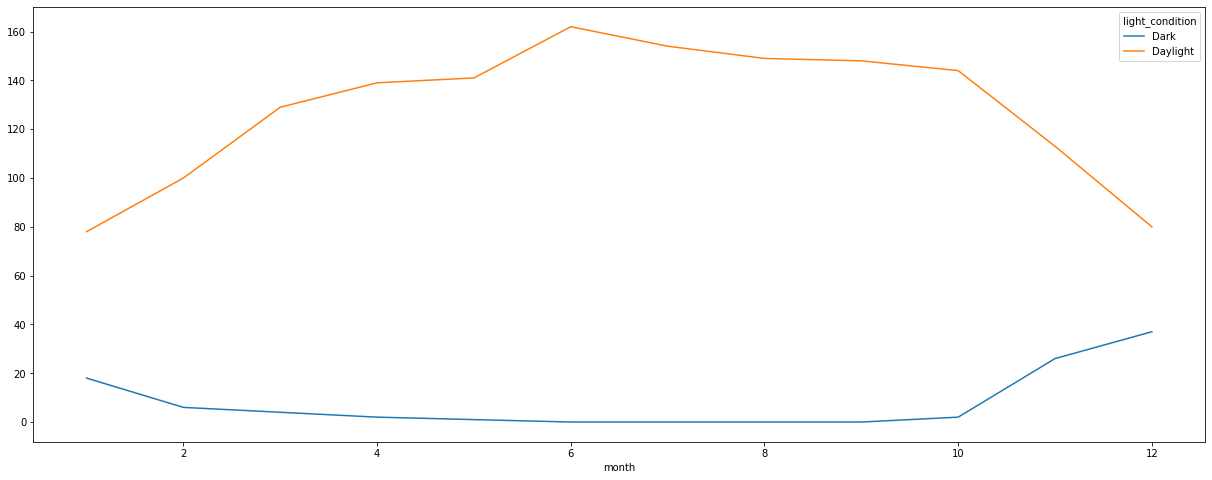

In [34]:
cross_tab = pd.crosstab(above_avg_state['month'],above_avg_state['light_condition'])
cross_tab.plot(kind='line',figsize=(21,8))

jika ditinjau pada setiap bulan, ada trend dimana dari bulan **Oktober** hingga **Desember**   adanya peningkatan kecelakaan pada saat gelap diikuti berkurangnya pergerakan pada siang hari dan<br> pada bulan **Januari** terdapat banyak angka kecelakaan pada malam hari

- jika dilihat ada apa dengan jalan **gelap** pada bulan tertentu, kita bandingkan dengan jalan yang **terang** dengan **rata-rata kecepatannya**

Text(0.5, 1.0, 'Terang Setiap Bulan')

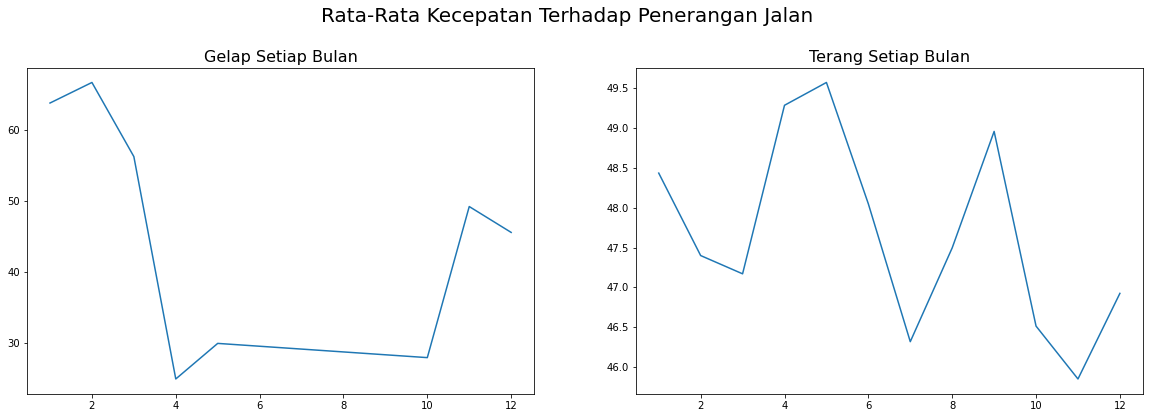

In [35]:
selected_dark = above_avg_state.query("light_condition == 'Dark'")
selected_daylight = above_avg_state.query("light_condition == 'Daylight'")

fig,ax = plt.subplots(1,2,figsize=(20,6))
fig.suptitle("Rata-Rata Kecepatan Terhadap Penerangan Jalan",fontsize=20, y=1.02)


ax[0].plot(selected_dark.groupby('month')['speed'].mean())
ax[0].set_title('Gelap Setiap Bulan',fontsize= 16)

ax[1].plot(selected_daylight.groupby('month')['speed'].mean())
ax[1].set_title('Terang Setiap Bulan',fontsize= 16)

jika dilihat pada **setiap bulannya**, adanya rata-rata yang perbedaanya cukup tinggi disaat **jalan gelap** pada bulan **Januari ,Oktober ,November ,dan Desember**, dan pada jalanan yang terang terdapat peningkatan kecepatan pada bulan **April ,Mei ,dan September**

- kita uji seberapa signifikan peningkatan rata-rata kecepatan **April ,Mei ,dan September** pada jalanan yang terang dengan **Confidence interval 90%**
    - H0 : Rata-rata kecepatan jalanan terang pada bulan **April ,Mei ,dan September** <= rata-rata jalanan siang keseluruhan
    - H1 : Rata-rata kecepatan jalanan terang pada bulan **April ,Mei ,dan September** > rata-rata jalanan siang keseluruhan

In [36]:
selected_month = selected_daylight.query("month == 4 or month == 6 or month == 9")
selected_daylight['speed'].describe().T

count    1537.000000
mean       47.701366
std        21.634570
min         0.000000
25%        38.000000
50%        50.000000
75%        60.000000
max       130.000000
Name: speed, dtype: float64

In [37]:
# menggunakan ttest 1 sample 1 tail
t_stat,p_val = stats.ttest_1samp(selected_month['speed'], 47.7)
print("P Value adalah",p_val/2)


P Value adalah 0.15664449836390326


c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


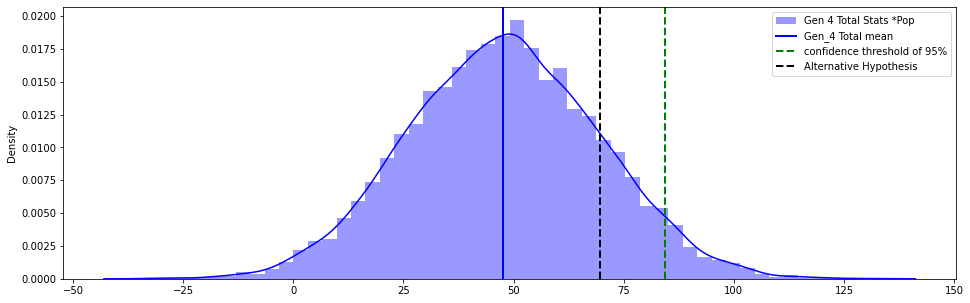

In [38]:
daylight_pop = np.random.normal(selected_daylight['speed'].mean(),selected_daylight['speed'].std(),10000)

# confidence interval 
# used cv = 0.05 since 1 tailed, confidence interval 0.90 
ci = stats.norm.interval(0.90, selected_month['speed'].mean(), selected_month['speed'].std())

# distribution
plt.figure(figsize=(16,5))
sns.distplot(daylight_pop, label='Gen 4 Total Stats *Pop',color='blue')

# mean
plt.axvline(selected_daylight['speed'].mean(), color='blue', linewidth=2, label='Gen_4 Total mean')

# ci line
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# h1 line
plt.axvline(daylight_pop.mean()+t_stat*daylight_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
# plt.axvline(gen_4_pop.mean()-t_stat*gen_4_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

hasil nya **H0 gagal ditolak** karena **p_value > 0.1**, maka peningkatan rata-rata kecepatan **April ,Mei ,dan September** tidak signifikan

- Pandangan pengemudi <br>
bagaimana keadaan pandangan pengemudi saat kecelakaan terjadi, seperti hasil dibawah , kebanyakan kecelakaan pandangan pengendara tidak tertutupi apapun

In [39]:
cross_tab = pd.crosstab(above_avg_state['month'],above_avg_state['d_vision'])
cross_tab #.plot(kind='line',figsize=(21,8))

d_vision,"Curve, Hill, or Other Roadway Design Features",In-Transport Motor Vehicle (Including Load),No Obstruction Noted,"Not-in-Transport Motor Vehicle (Parked, Working)",Obstructing Angles on Vehicle,Obstructing Interior to the Vehicle,Other Visual Obstruction,"Rain, Snow, Fog, Smoke, Sand, Dust","Reflected Glare, Bright Sunlight, Headlights","Trees, Crops, Vegetation",Vision Obscured – No Details
month,,,,,,,,,,,
1,0,2,93,0,0,0,0,0,1,0,0
2,0,1,101,0,0,0,0,2,2,0,0
3,0,0,131,0,0,0,0,2,0,0,0
4,1,1,133,0,0,0,0,2,3,1,0
5,1,1,136,0,0,0,0,1,0,2,1
6,2,1,157,0,1,0,0,0,0,0,1
7,0,1,150,0,0,0,1,1,1,0,0
8,3,1,142,1,0,0,0,1,1,0,0
9,1,0,144,0,0,0,0,0,2,1,0


dari tabel diatas, tidak ada penghalang pandangan yang berarti pada pengemudi saat terjadi kecelakaan

### Kondisi Permukaan Jalan
kecelakaan ditinjau dari naik turun dan lika liku jalan

- Ditinjau dari bentuk dan kontur jalan dan kecepatan pengendara

<BarContainer object of 7 artists>

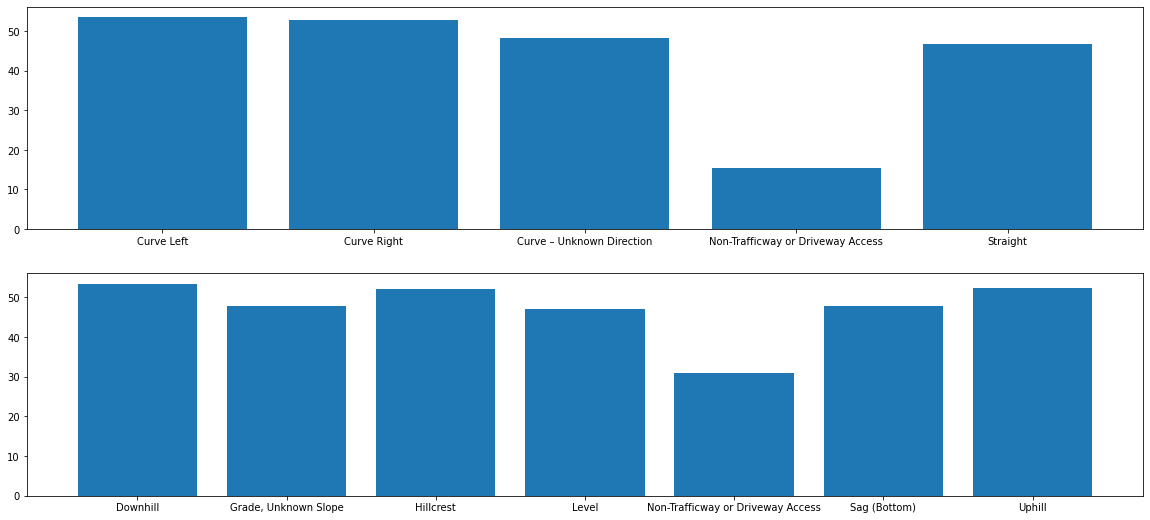

In [40]:
grade = above_avg_state.groupby('rd_grade')['speed'].mean()
allignment = above_avg_state.groupby('rd_allignment')['speed'].mean()
fig,ax = plt.subplots(2,figsize=(20,9))
ax[0].bar(allignment.index,allignment)
ax[1].bar(grade.index,grade)


**Rata-rata kecepatan** pengendara yang mengalami kecelakaan,antara **jalan berbelok dan lurus hampir sama**. juga jika dilihat dari kontur jalan,<br> jalan dengan **kontur datar rata-rata kecepatannya hampir sama** dengan **jalan naik dan jalan turun**

Text(0.5, 1.0, 'Dataran Tinggi Month')

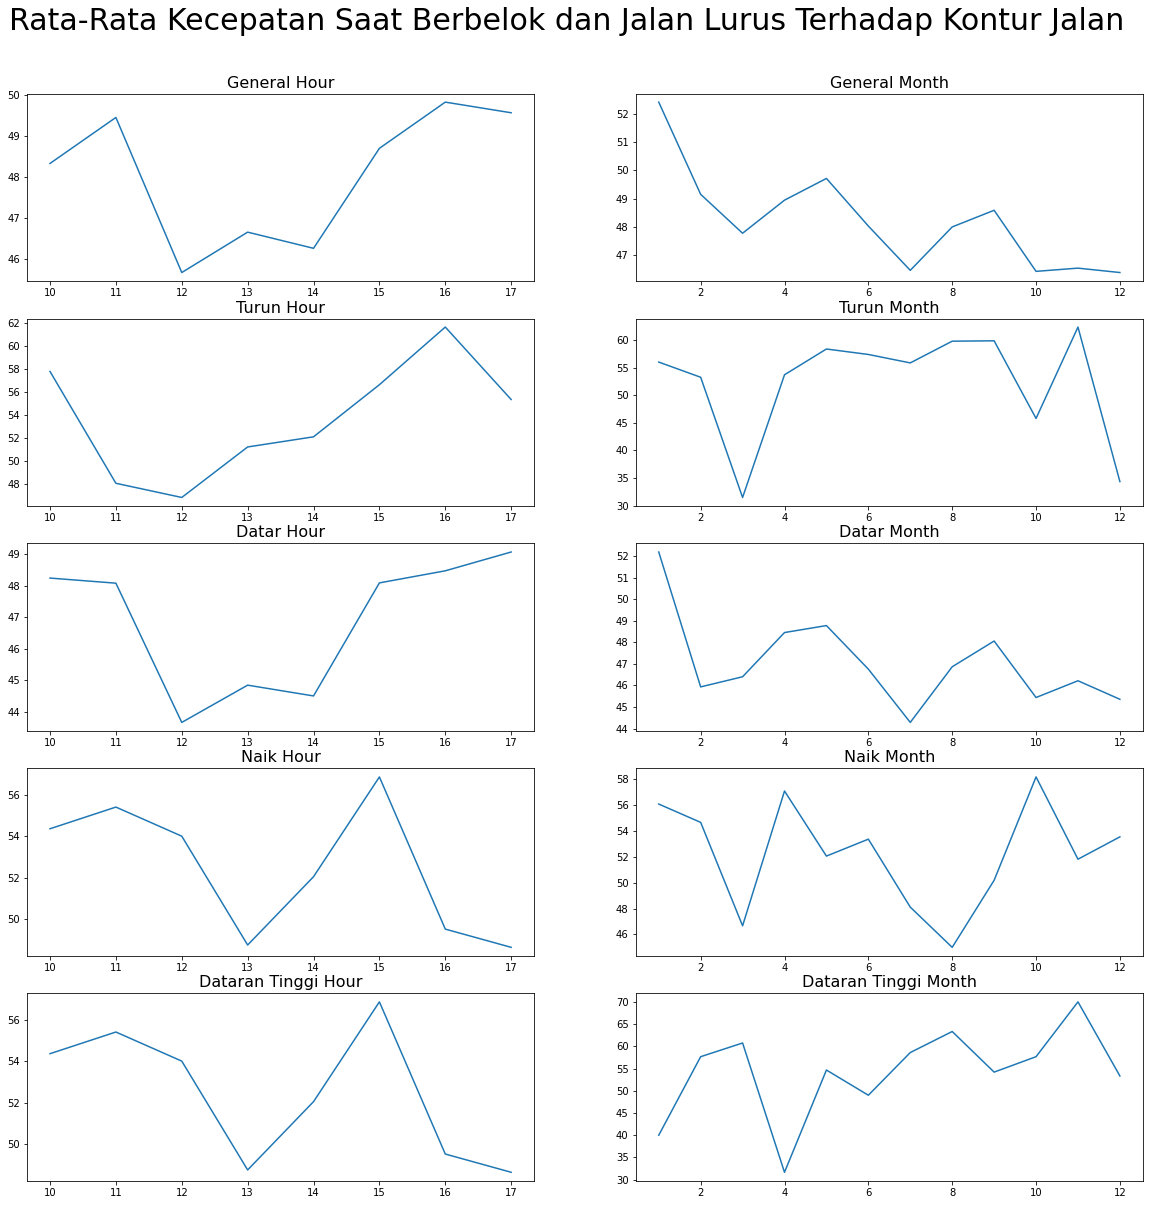

In [41]:
selected_general = above_avg_state.query("rd_allignment == 'Curve Right' or rd_allignment == 'Curve Left' or rd_allignment == 'Straight'")
selected_down = selected_general.query("rd_grade == 'Downhill'")
selected_level = selected_general.query("rd_grade == 'Level'")
selected_up = selected_general.query("rd_grade == 'Uphill'")
selected_crest = selected_general.query("rd_grade == 'Hillcrest'")


fig,ax = plt.subplots(5,2,figsize=(20,20))
fig.suptitle("Rata-Rata Kecepatan Saat Berbelok dan Jalan Lurus Terhadap Kontur Jalan",fontsize=30, y=.94)


ax[0,0].plot(selected_general.groupby('hour')['speed'].mean())
ax[0,0].set_title('General Hour',fontsize= 16)

ax[1,0].plot(selected_down.groupby('hour')['speed'].mean())
ax[1,0].set_title('Turun Hour',fontsize= 16)

ax[2,0].plot(selected_level.groupby('hour')['speed'].mean())
ax[2,0].set_title('Datar Hour',fontsize= 16)

ax[3,0].plot(selected_up.groupby('hour')['speed'].mean())
ax[3,0].set_title('Naik Hour',fontsize= 16)

ax[4,0].plot(selected_up.groupby('hour')['speed'].mean())
ax[4,0].set_title('Dataran Tinggi Hour',fontsize= 16)

ax[0,1].plot(selected_general.groupby('month')['speed'].mean())
ax[0,1].set_title('General Month',fontsize= 16)

ax[1,1].plot(selected_down.groupby('month')['speed'].mean())
ax[1,1].set_title('Turun Month',fontsize= 16)

ax[2,1].plot(selected_level.groupby('month')['speed'].mean())
ax[2,1].set_title('Datar Month',fontsize= 16)

ax[3,1].plot(selected_up.groupby('month')['speed'].mean())
ax[3,1].set_title('Naik Month',fontsize= 16)

ax[4,1].plot(selected_crest.groupby('month')['speed'].mean())
ax[4,1].set_title('Dataran Tinggi Month',fontsize= 16)

dari **pengelompkan jam**, pengendara mengalami kecelakaan pada **rata-rata kecepatan lebih rendah** pada jalanan **datar** daripada jalanan **naik dan turun** khususnya pada **pukul 10 dan 15 pada tanjakan** dan **pukul 10 dan 16 pada turunan**

## 5. Kesimpulan

hasil analisa pada bagian **Analysis dan Perhitungan** Terjawab semua pertanyaan dari rumusan masalah : 
1. kapan terjadinya peningkatan kecelakaan ? 
    - dari analisa dan perhitungannya dari **pukul 10 hingga 17** telah terjadi **peningkatan yang signifikan** 
    - karena ada peningkatan disitu kita **pilih data** dari **pukul 10 hingga 17** untuk menjawab rumusan masalah lainnya.
2. dimana saja lokasi nya lokasi ?
    - jika dilihat dari **Negara Bagiannya**
        -  'Utah', 'Pennsylvania', 'North Carolina', 'Arizona', 'Alabama',
       'California', 'Kentucky', 'New York', 'Louisiana', 'Ohio',
       'Wisconsin', 'Illinois', 'Nevada'
    - jika dilihat dari populasi area , daerah **Rural** lebih banyak terjadi kecelakaan dari pada daerah **Urban**
3. Apakah cuaca menjadi penyebab kecelakaan ?
    - Cuaca paling banyak terjadi pada cuaca **Cerah** dan tidak ada cuaca lain yang berpengaruh secara signifikan 
4. Prilaku pengemudi
    - bagaimana kondisi pengendara saat terjadi kecelakaan?
        - kebanyakan keadaan pengendara normal, ada beberapa yang terpengruh **alkohol atau obat-obatan** 
    - apakah pengemudi dalam keadaan tidak fokus?
        - kebanyakan pengemudi dalam keadaan fokus dan ada sedikit yang melakukan aktifitas lain saat mengemudi
    - apakah pengemudi mengebut?
        - setelah dianalisa kebanyakan pengemudi **tidak mengebut** akan tetapi tidak sedikit pengendara yang mengebut
        - tetapi jika dilihat dari jam nya, 
        rata-rata kecepatan pengemudi meningkat, dan pada jalanan minim cahaya rata-rata kecepatan pengemudi kecelakaan meningkat **setiap bulan** pada bulan **Januari ,Oktober ,November ,dan Desember** 
5. pandangan pengemudi
    - bagaimana pencahayaan sekitar jalan
    **mayoritas** banyak yang **berkendara pada jalanan yang terang**, akan tetapi jika dilihat secara **setiap bulan** pada bulan **Januari ,Oktober ,November ,dan Desember** terjadi peningkatan kecelakaan pada jalanan minim cahaya
    -   jika dilihat dari pandangan mengemudi kebanyakan kecelakaan, pengemudi tidak terhalang pandangannya.
6.  jika dilihat dari bentuk jalan, ada kecenderungan **peningkatan kecepatan** pada **tikungan** dan **kontur** jalan naik dan turun, terutama pada **pukul 10 dan 15**

 **Mengapa kecelakaan bisa terjadi ?** dari sekumpulan jawaban diatas kecelakaan terjadi pada pukul **10 hingga 17** dan diantara state yang terpilih 'Utah', 'Pennsylvania', 'North Carolina', 'Arizona', 'Alabama',
       'California', 'Kentucky', 'New York', 'Louisiana', 'Ohio',
       'Wisconsin', 'Illinois', 'Nevada'
adanya kecenderungan **naiknya rata-rata kecepatan** disaat **minim pencahayaan** **naiknya rata-rata kecepatan** juga ditemukan pada **jalan tikungan tanjakan dan turunan** dan khusus pada pada bulan **Januari ,Oktober ,November ,dan Desember** naiknya jumlah kecelakaan pada tempat yang relatif gelap